# Introduction

During the visualization of this dataset, we will try to answer a few questions and collect insights.

### Key questions to answer

1. What is the dataset coverage by year and month?
2. How many unique artists, tracks, and genres are there each year?  
3. How has average track popularity changed over time?
4. Are songs getting shorter or longer over time?
5. Who are the top artists by number of tracks and by average popularity?
6. What is the distribution of artist career spans?
7. Is there a seasonal effect on popularity based on release month?
8. What percentage of tracks are labeled explicit and how has that changed over time?

# Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Loading data

In [2]:
df = pd.read_csv("spotify_data clean.csv")
df

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8577,0AQquaENerGps8BQmbPw14,Big Iron,1,71,False,Marty Robbins,60,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30,15,album,3.92
8578,4f8hBeMXMvssn6HtFAtblo,El Paso,10,64,False,Marty Robbins,61,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30,15,album,4.32
8579,0Vy7wsXNFrbNc6UTWoScnM,Over the Rainbow,5,8,False,The Mystics,27,18184,doo-wop,2ifB9Xjp9DdpqLlYlY60QW,Presenting The Mystics,1959-02-11,9,compilation,2.28
8580,760clbeDBWmBsBLbszWuNZ,I'm A Man,2,55,False,Bo Diddley,44,333376,"blues, classic blues, rock and roll, rockabilly",1cbtDEwxCjMhglb49OgNBR,Bo Diddley,1958-01-01,12,album,2.74


# Quick data overview

In [3]:
df.describe()

,track_number,track_popularity,artist_popularity,artist_followers,album_total_tracks,track_duration_min
count,8582.000000,8582.000000,8582.000000,8.582000e+03,8582.000000,8582.000000
mean,5.772547,52.356211,69.730016,2.403472e+07,13.789443,3.492805
std,6.052792,23.816076,19.645979,3.803180e+07,11.887131,1.057970
min,1.000000,0.000000,0.000000,0.000000e+00,1.000000,0.070000
25%,1.000000,39.000000,60.000000,4.623200e+05,6.000000,2.880000
50%,4.000000,58.000000,74.000000,6.105547e+06,13.000000,3.445000
75%,9.000000,71.000000,84.000000,2.725255e+07,17.000000,3.990000
max,102.000000,99.000000,100.000000,1.455421e+08,181.000000,13.510000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8582 non-null   object 
 1   track_name          8582 non-null   object 
 2   track_number        8582 non-null   int64  
 3   track_popularity    8582 non-null   int64  
 4   explicit            8582 non-null   bool   
 5   artist_name         8579 non-null   object 
 6   artist_popularity   8582 non-null   int64  
 7   artist_followers    8582 non-null   int64  
 8   artist_genres       5221 non-null   object 
 9   album_id            8582 non-null   object 
 10  album_name          8582 non-null   object 
 11  album_release_date  8582 non-null   object 
 12  album_total_tracks  8582 non-null   int64  
 13  album_type          8582 non-null   object 
 14  track_duration_min  8582 non-null   float64
dtypes: bool(1), float64(1), int64(5), object(8)
memory usag

In [5]:
df.columns

Index(['track_id', 'track_name', 'track_number', 'track_popularity',
       'explicit', 'artist_name', 'artist_popularity', 'artist_followers',
       'artist_genres', 'album_id', 'album_name', 'album_release_date',
       'album_total_tracks', 'album_type', 'track_duration_min'],
      dtype='object')

In [6]:
df.isna().sum()

track_id                 0
track_name               0
track_number             0
track_popularity         0
explicit                 0
artist_name              3
artist_popularity        0
artist_followers         0
artist_genres         3361
album_id                 0
album_name               0
album_release_date       0
album_total_tracks       0
album_type               0
track_duration_min       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

track_id              8582
track_name            7462
track_number            54
track_popularity        98
explicit                 2
artist_name           2547
artist_popularity       96
artist_followers      3740
artist_genres          661
album_id              5205
album_name            4870
album_release_date    2384
album_total_tracks      82
album_type               3
track_duration_min     647
dtype: int64

In [9]:
df.shape

(8582, 15)

# Dealing with NULL values

Since both 'artist_name' and 'artist_genres' are objects, we will fill them with the mode.

In [10]:
df["artist_name"] = df["artist_name"].fillna(df["artist_name"].mode()[0])
df["artist_genres"] = df["artist_genres"].fillna(df["artist_genres"].mode()[0])
df.isna().sum()

track_id              0
track_name            0
track_number          0
track_popularity      0
explicit              0
artist_name           0
artist_popularity     0
artist_followers      0
artist_genres         0
album_id              0
album_name            0
album_release_date    0
album_total_tracks    0
album_type            0
track_duration_min    0
dtype: int64

# Simplify dataset

We change data type for date attributes.

In [11]:
df["album_release_date"] = pd.to_datetime(df["album_release_date"])
df["album_release_date"].dtype

dtype('<M8[ns]')

In [12]:
df["explicit"] = df["explicit"].apply(lambda x: "Yes" if x==True else "No")

# Save cleaned data to use later for dashboard

In [13]:
# df.to_csv("cleaned_spotify.csv")

# Visualization

### 1. What is the dataset coverage by year and month?

In [14]:
matrix = df[["album_release_date"]]
matrix["year"] = matrix["album_release_date"].dt.year
matrix["month"] = matrix["album_release_date"].dt.month_name()
matrix

,album_release_date,year,month
0,2025-10-31,2025,October
1,2025-10-31,2025,October
2,2025-10-31,2025,October
3,2025-10-31,2025,October
4,2025-10-30,2025,October
...,...,...,...
8577,1959-06-30,1959,June
8578,1959-06-30,1959,June
8579,1959-02-11,1959,February
8580,1958-01-01,1958,January


In [15]:
matrix = matrix.sort_values(by="year", ascending=False)
matrix

,album_release_date,year,month
0,2025-10-31,2025,October
514,2025-05-23,2025,May
505,2025-05-30,2025,May
506,2025-05-30,2025,May
507,2025-05-30,2025,May
...,...,...,...
8577,1959-06-30,1959,June
8578,1959-06-30,1959,June
8579,1959-02-11,1959,February
8580,1958-01-01,1958,January


In [16]:
month_map = months = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

matrix = matrix.groupby(["month", "year"])["year"].size().unstack().sort_index(key=lambda x: x.map(month_map)).fillna(0)
matrix

year,1952,1958,1959,1960,1962,1963,1964,1965,1966,1967,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
month,,,,,,,,,,,,,,,,,,,,,
January,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,23.0,15.0,41.0,33.0,38.0,35.0,25.0,35.0,32.0,58.0
February,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,19.0,18.0,20.0,38.0,41.0,31.0,30.0,41.0,39.0,44.0
March,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,13.0,33.0,38.0,43.0,56.0,49.0,27.0,47.0,87.0,61.0
April,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,39.0,53.0,47.0,37.0,26.0,52.0,54.0,47.0,89.0,49.0
May,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,48.0,51.0,47.0,31.0,29.0,36.0,67.0,24.0,53.0,53.0
June,0.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0,3.0,7.0,...,36.0,65.0,65.0,32.0,17.0,41.0,29.0,36.0,70.0,69.0
July,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,23.0,10.0,49.0,39.0,44.0,53.0,62.0,39.0,62.0
August,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,36.0,20.0,74.0,61.0,44.0,23.0,27.0,54.0,81.0,126.0
September,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,17.0,23.0,25.0,38.0,45.0,29.0,43.0,59.0,50.0,126.0


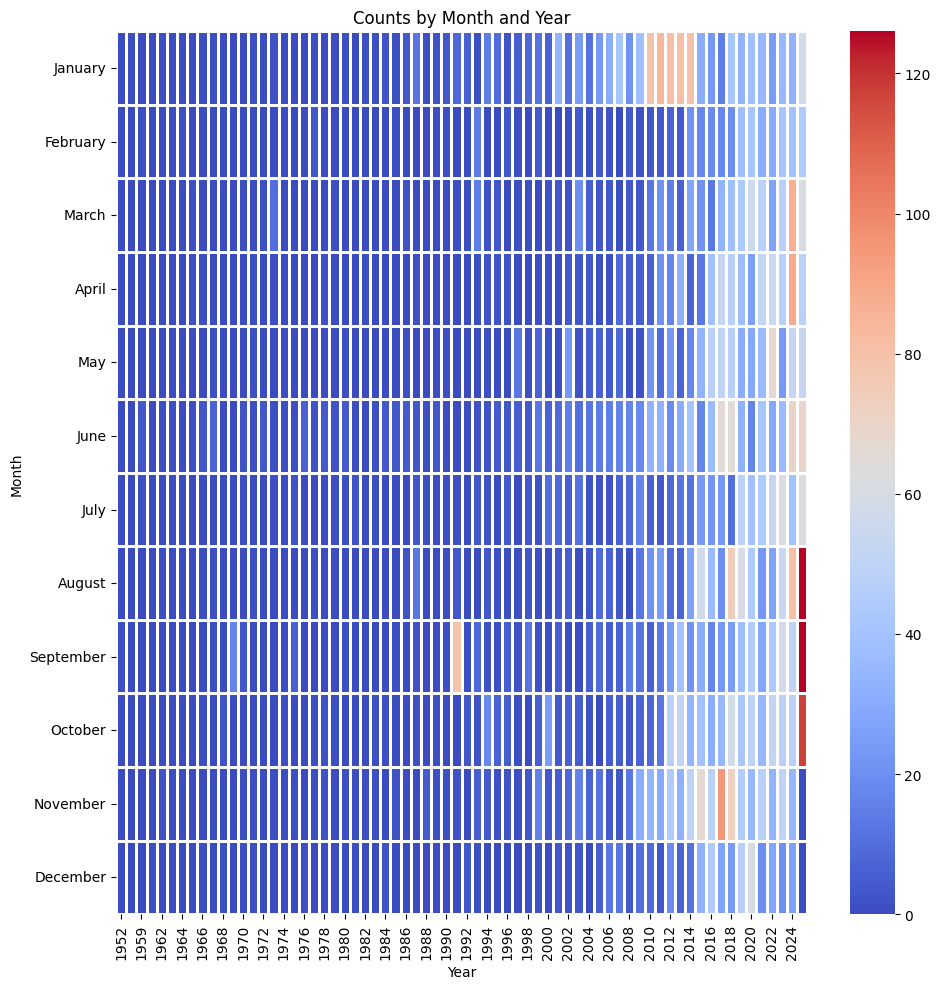

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(matrix, cmap="coolwarm", linewidths=1)
plt.ylabel("Month")
plt.xlabel("Year")
plt.title("Counts by Month and Year")
plt.tight_layout()
plt.show()

- The number of albums released through the years has increased drastically and we can see that months between March and October are the most active.

### 2. How many unique artists, tracks, and genres are there each year?  

In [18]:
df["year"] = df["album_release_date"].dt.year
df["month"] = df["album_release_date"].dt.month_name()
df["day"] = df["album_release_date"].dt.day

In [19]:
df2 = df.groupby("year").agg(
    tracks = ("track_id", "nunique"),
    genres = ("artist_genres", "nunique"),
    artists = ("artist_name", "nunique")
).reset_index()
df2

,year,tracks,genres,artists
0,1952,1,1,1
1,1958,1,1,1
2,1959,5,3,3
3,1960,1,1,1
4,1962,5,3,4
...,...,...,...,...
63,2021,443,65,223
64,2022,468,87,259
65,2023,523,96,271
66,2024,648,102,304


In [20]:
df2 = df2.melt(id_vars="year", var_name="category", value_name="count")
df2

,year,category,count
0,1952,tracks,1
1,1958,tracks,1
2,1959,tracks,5
3,1960,tracks,1
4,1962,tracks,5
...,...,...,...
199,2021,artists,223
200,2022,artists,259
201,2023,artists,271
202,2024,artists,304


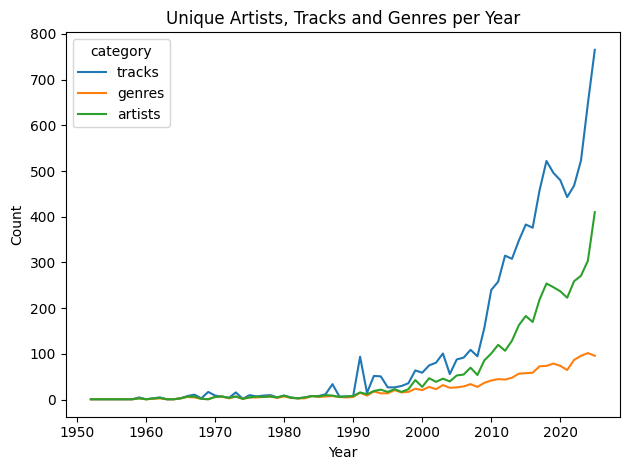

In [21]:
sns.lineplot(data=df2, x="year", y="count", hue="category")
plt.title("Unique Artists, Tracks and Genres per Year")
plt.ylabel("Count")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

- From 1950 to 2000, the number of artists, tracks, and genres stayed roughly the same.
- After 2000, the number of tracks jumps up very fast (exponential growth), meaning lots more music is being released.
- Artists also grow quickly, but more like a squared curve (n²), showing many more creators over time which is caused by modern tools and how easy it is to get into the industry.
- Genres grow slowly, more like a logarithmic curve, so most new music fits into existing categories.

In short: after 2000 we get many more tracks and artists, but the genre list only expands slowly.

### 3. How has average track popularity changed over time?

In [22]:
df3 = df.groupby("year").agg(average_track_popularity = ("track_popularity", "mean")).round(2).reset_index()
df3

,year,average_track_popularity
0,1952,45.00
1,1958,55.00
2,1959,55.00
3,1960,47.00
4,1962,53.00
...,...,...
63,2021,52.59
64,2022,50.88
65,2023,52.22
66,2024,53.70


In [23]:
df3["rolling_mean"] = df3["average_track_popularity"].rolling(window=15, min_periods=5).mean().round(2)
df3

,year,average_track_popularity,rolling_mean
0,1952,45.00,NaN
1,1958,55.00,NaN
2,1959,55.00,NaN
3,1960,47.00,NaN
4,1962,53.00,51.00
...,...,...,...
63,2021,52.59,51.68
64,2022,50.88,51.60
65,2023,52.22,51.61
66,2024,53.70,51.91


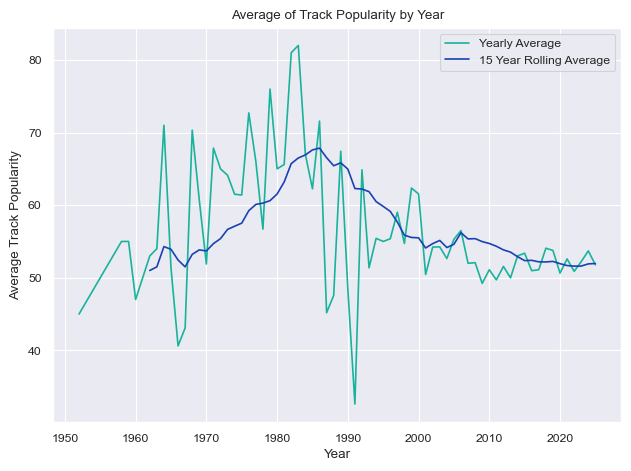

In [24]:
sns.set_theme("paper")
sns.lineplot(data=df3, x="year", y="average_track_popularity", color="#19b39c", label="Yearly Average")
sns.lineplot(data=df3, x="year", y="rolling_mean", color="#1942b3", label="15 Year Rolling Average")
plt.title("Average of Track Popularity by Year")
plt.ylabel("Average Track Popularity")
plt.xlabel("Year")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

- Yearly averages between 1950-2000 are noisy, but the 15-year rolling average shows a stable rise until 1985 where it has reached the peak, then a decline back to early levels by 2000.
- From 2000 onward both lines are stable, suggesting a stable popularity baseline.

### 4. Are songs getting shorter or longer over time?

In [25]:
df4 = df.groupby("year").agg(average_duration=("track_duration_min", "mean")).round(2).reset_index()
df4

,year,average_duration
0,1952,2.02
1,1958,2.74
2,1959,3.05
3,1960,2.26
4,1962,2.70
...,...,...
63,2021,3.38
64,2022,3.12
65,2023,3.10
66,2024,3.05


In [26]:
df4["rolling_mean"] = df4["average_duration"].rolling(window=10, min_periods=3).mean().round(2)
df4

,year,average_duration,rolling_mean
0,1952,2.02,NaN
1,1958,2.74,NaN
2,1959,3.05,2.60
3,1960,2.26,2.52
4,1962,2.70,2.55
...,...,...,...
63,2021,3.38,3.57
64,2022,3.12,3.49
65,2023,3.10,3.41
66,2024,3.05,3.34


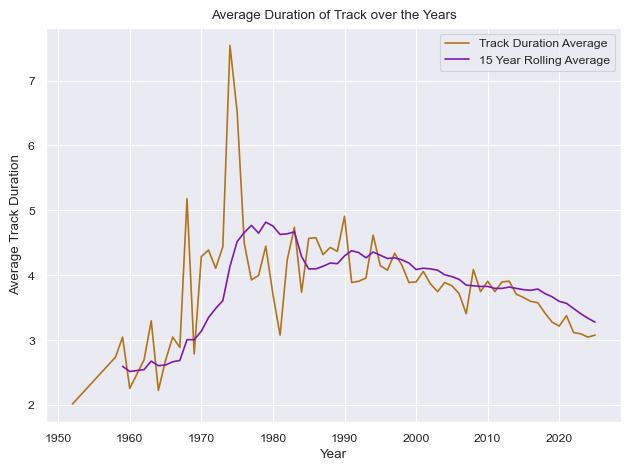

In [27]:
sns.lineplot(data=df4, x="year", y="average_duration", color="#b37319", label="Track Duration Average")
sns.lineplot(data=df4, x="year", y="rolling_mean", color="#7d19b3", label="15 Year Rolling Average")
plt.title("Average Duration of Track over the Years")
plt.ylabel("Average Track Duration")
plt.xlabel("Year")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

- Yearly average rose quickly between 1950 and 1975 hitting a peak of 7.6 mininutes, this might be due to the right in popularity over the years as we have seen in the previous question.
- Between 1975 and 2025, the average yearly duration of tracks seems to drop slowly.

### 5. Who are the top artists by number of tracks and by average popularity?

In [28]:
df5 = (
    df.groupby(["artist_name"])
    .agg(
        total_tracks=("track_id", "count"), 
        average_popularity=("artist_popularity", "mean")
        )
    .reset_index()
    .sort_values(
        by=["total_tracks", "average_popularity"], 
        ascending=[False, False]
        )
    .head(15)
    )
df5["average_popularity"] = df5["average_popularity"].round()
df5

,artist_name,total_tracks,average_popularity
2121,Taylor Swift,327,99.0
2222,The Weeknd,141,93.0
1237,Lana Del Rey,99,88.0
145,Ariana Grande,94,90.0
1601,Nirvana,91,81.0
597,Drake,84,95.0
1743,Post Malone,83,86.0
2182,The Neighbourhood,77,83.0
1231,Lady Gaga,70,88.0
1643,Olivia Rodrigo,68,84.0


In [29]:
df5 = df5.melt(id_vars="artist_name", var_name="category", value_name="value")
df5

,artist_name,category,value
0,Taylor Swift,total_tracks,327.0
1,The Weeknd,total_tracks,141.0
2,Lana Del Rey,total_tracks,99.0
3,Ariana Grande,total_tracks,94.0
4,Nirvana,total_tracks,91.0
5,Drake,total_tracks,84.0
6,Post Malone,total_tracks,83.0
7,The Neighbourhood,total_tracks,77.0
8,Lady Gaga,total_tracks,70.0
9,Olivia Rodrigo,total_tracks,68.0


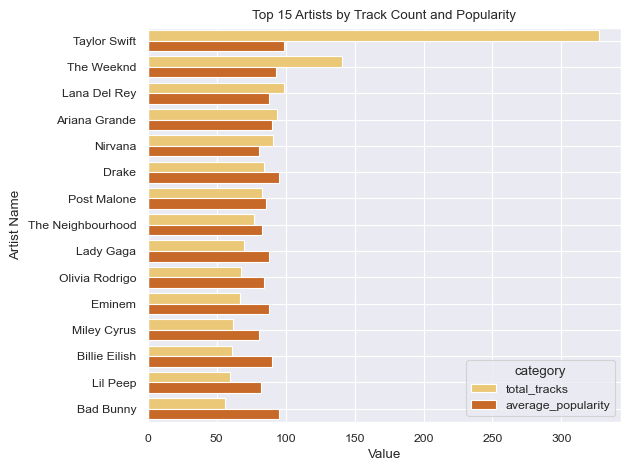

In [30]:
sns.set_style("dark")
sns.barplot(data=df5, y="artist_name", x="value", hue="category", palette="YlOrBr")
plt.title("Top 15 Artists by Track Count and Popularity")
plt.ylabel("Artist Name")
plt.xlabel("Value")
plt.grid()
plt.tight_layout()
plt.show()

- Tylor Swift has the most tracks with 327 tracks more than double The Weeknd who comes seconds, having the highest popularty with 99 suggests a consistently engaging release. 
- Newer artists such as Olivia Rodrigo and Billie Eilish, even with fewer tracks they can match the popularity of long established artists.

### 6. What is the distribution of artist career spans?

In [31]:
df6 = (
    df.groupby("artist_name")
    .agg(
        first_year = ("year", "min"),
        last_year = ("year", "max")
        )
    .reset_index()
    )
df6["career_span"] = df6["last_year"] - df6["first_year"]
df6

,artist_name,first_year,last_year,career_span
0,$uicideboy$,2015,2018,3
1,'Ery Noice,2022,2022,0
2,(((()))),2022,2022,0
3,*NSYNC,2000,2000,0
4,-,2021,2021,0
...,...,...,...,...
2542,攬佬SKAI ISYOURGOD,2024,2024,0
2543,時瀬高等学校箏曲部,2017,2017,0
2544,桑原まこ,2016,2016,0
2545,梶浦 由記,2016,2016,0


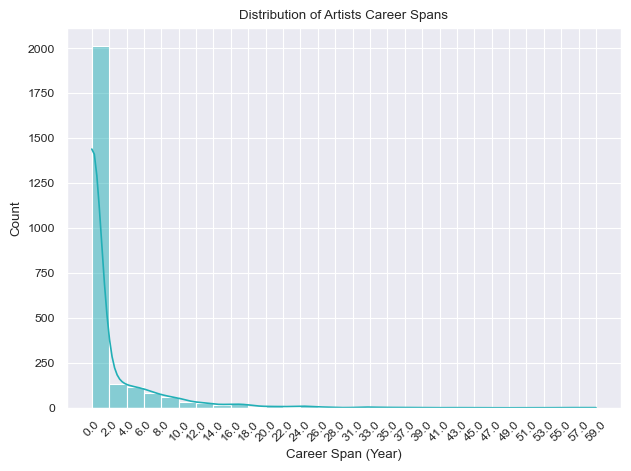

In [32]:
bin_edges = np.linspace(df6["career_span"].min(), df6["career_span"].max(), 30)
rounded_ticks = np.round(bin_edges)
sns.set_theme("paper")
sns.histplot(data=df6, x="career_span", bins=bin_edges, kde=True, color="#22afb6")
plt.title("Distribution of Artists Career Spans")
plt.ylabel("Count")
plt.xlabel("Career Span (Year)")
plt.xticks(bin_edges, rounded_ticks, rotation=45)
plt.tight_layout()
plt.show()

- 0–2 years: The vast majority (around 90%) of artists fall here, meaning most careers are very short lived. That could reflect on artists who disappear quickly, or those who have yet to build a career
- 2–18 years: There is a gradual decline in frequency, showing that fewer artists sustain their careers beyond those early years, but some persist—125 down toward almost zero.
- 18–59 years: Almost zero artists have such long careers, but not quite zero, which is expected: only a handful of artists stay active for decades.

### 7. Is there a seasonal effect on popularity based on release month?

In [33]:
df7 = (
    df.groupby("month")
    ["track_popularity"]
    .mean()
    .round(2)
    .sort_index(key=lambda x: x.map(month_map))
    .reset_index()
    )
df7

,month,track_popularity
0,January,49.25
1,February,50.84
2,March,55.49
3,April,51.17
4,May,57.01
5,June,54.13
6,July,51.80
7,August,52.62
8,September,51.09
9,October,52.44


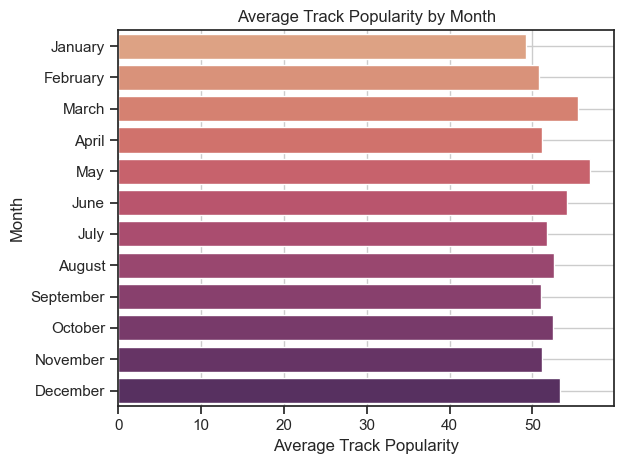

In [34]:
sns.set_theme("notebook")
sns.set_style("ticks")
sns.barplot(data=df7, x="track_popularity", y="month", palette="flare")
plt.title("Average Track Popularity by Month")
plt.ylabel("Month")
plt.xlabel("Average Track Popularity")
plt.grid()
plt.tight_layout()
plt.show()

- The months March, May and June sit highly above the annual range, while the early months January and February are noticeably lower. This suggests that timing the release really plays a high role in a track's popularity.
- Late spring to early summer tend to achieve higher than the rest, along with early winter ( December ).

### 8. What percentage of tracks are labeled explicit and how has that changed over time?

In [35]:
df8 = (
    df.groupby("year")
    .agg(explicit_percentage = ("explicit", lambda x: round(sum(np.where(x=="Yes", 1, 0)) / len(x)*100, 2)))
    .reset_index()
    )
df8

,year,explicit_percentage
0,1952,0.00
1,1958,0.00
2,1959,0.00
3,1960,0.00
4,1962,0.00
...,...,...
63,2021,32.05
64,2022,29.70
65,2023,30.21
66,2024,31.17


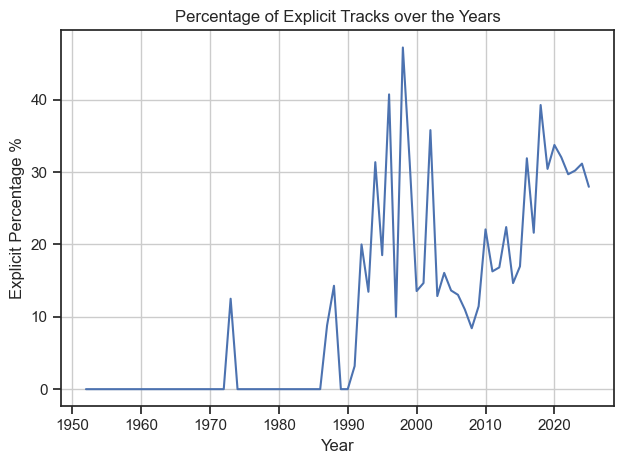

In [37]:
sns.lineplot(data=df8, x="year", y="explicit_percentage")
plt.title("Percentage of Explicit Tracks over the Years")
plt.ylabel("Explicit Percentage %")
plt.xlabel("Year")
plt.grid()
plt.tight_layout()
plt.show()

- Explicit tracks were almost non existant between 1950 and '80s.
- Their share starts to climb in the mid ’80s and peaks around the late ’90s above 45%.
- After that peak, the percentage drops until about 2010, then begins rising again. 